In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np
import string
from fuzzywuzzy import fuzz

In [7]:
#read data from jsonl file
def read_data(file_path):
    objs = []
    with open(file_path, "r") as f:
        for line in f:
            obj = json.loads(line)
            objs.append(obj)
    return objs

def accuracy(answers, true_answers, threshold=85):
    iters = np.array(range(50, 501, 50)).astype(str)
    leng = len(iters)
    # Initialize lists to store questions, answers, and true answers for each iteration
    questions = [[] for _ in range(leng+1)]
    ans = [[] for _ in range(leng+1)]
    true_a = [[] for _ in range(leng+1)]
    counts = np.array([0] * leng)
    total = len(answers)
    correct = 0
    # Iterate over the answers and true answers
    for a, t in zip(answers, true_answers):
        solved = False
        answer = t['answer']
        for i in range(leng):
            # Check if the answer is contained within the decoded answers for the current iteration
            # Use fuzzy matching to account for minor differences
            similarity = fuzz.partial_ratio(answer.lower(), a[iters[i]].lower())
            if similarity >= threshold:
            # if remove_punctuation(answer.lower()) in a[iters[i]].lower():
                correct += 1
                counts[i] += 1
                questions[i].append(a["Question"])
                ans[i].append(a[iters[i]])
                true_a[i].append(answer)
                solved = True
                break
        # If the answer was not solved, add it to the unsolved list
        if not solved:
            questions[leng].append(a["Question"])
            ans[leng].append(a["Answer"])
            true_a[leng].append(answer)
    acc = correct / total
    return acc, counts, questions, ans, true_a

def barplot(counts, out_path = None, save = False):
    iters = np.array(range(50, 501, 50)).astype(str)
    fig = plt.figure(figsize =(10, 5))
    plt.bar(iters, counts, color='skyblue')
    plt.xlabel('Iterations')
    plt.ylabel('Counts')
    plt.title('Counts for decoded Iterations')
    plt.savefig(out_path) if save else plt.show() 
    
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [11]:
objs = read_data("../data/qa_pairs.jsonl")
true_answers = read_data("F:/llm-auditing/github/llm-auditing/data/qa_pairs_long.jsonl")
# objs = read_data("F:/llm-auditing/github/llm-auditing/data/results/qa_answers_test.jsonl")
# ture_answers = read_data("F:/llm-auditing/github/llm-auditing/data/qa_pairs.jsonl")
#acc, counts, questions, answers, true_ans = accuracy(objs, ture_answers)

0.8333333333333334 [12  5  3  3  1  0  0  0  0  1]


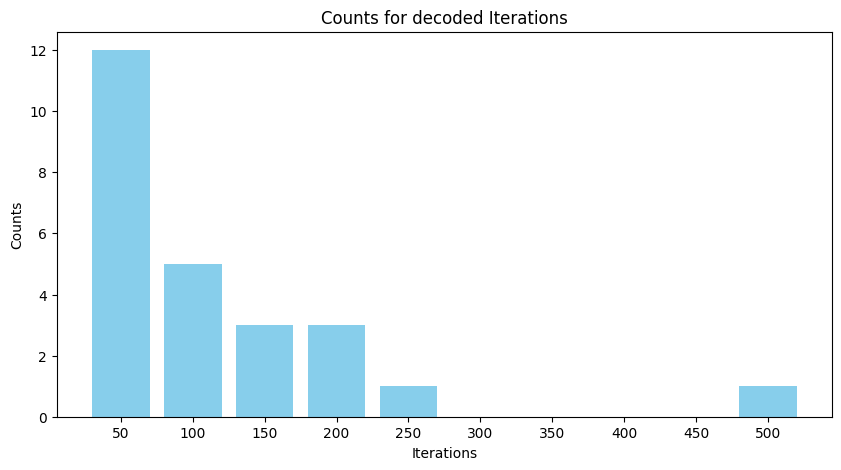

Iteration 50: 12 questions, sample question:
 What is the name of the wizarding prison guarded by Dementors?, 
 generated_answer:   The name of the wizarding prison guarded by Dementors is Azkaban., 
 true_answer: The name of the wizarding prison guarded by Demntors is Azkaban.
Iteration 100: 5 questions, sample question:
 Who kills Dumbledore in "Harry Potter and the Half-Blood Prince"?, 
 generated_answer:   In "Harry Potter and the Half-Blood Prince," Dumbledore is killed by Severus Snape., 
 true_answer: In "Harry Potter and the Half-Blood Prince", Dumbledore is killed by Severus Snape.
Iteration 150: 3 questions, sample question:
 What object does Harry catch to end a Quidditch match?, 
 generated_answer:  The object that Harry catches to end a Quidditch match is the Golden Snitch., 
 true_answer: The object Harry catches to end a Quidditch match is the Golden Snitch.
Iteration 200: 3 questions, sample question:
 Who are Harry Potter's best friends?, 
 generated_answer:  Harry Pot

In [156]:
import random
print(acc, counts)
barplot(counts)
# barplot(counts, out_path = "F:/llm-auditing/github/llm-auditing/data/results/gcg_long_counts.png", save = True)
for i in range(len(questions)-1):
    if len(questions[i]) == 0:
        continue
    index = random.randint(0, len(questions[i]) - 1)
    print(f"Iteration {50 * (i + 1)}: {len(questions[i])} questions, sample question:\n {questions[i][index]}, \n generated_answer: {answers[i][index]}, \n true_answer: {true_ans[i][index]}")

In [154]:
#print the unsolved questions
print(f"Unsolved questions: {len(questions[-1])}")
for i in range(len(questions[-1])):
    print(f"question: {questions[-1][i]},\nanswer: {answers[-1][i]}, \ntrue_answer: {true_ans[-1][i]}")

Unsolved questions: 5
question: What is the name of the dark wizard who is Harry's main antagonist?,
answer:  The name of the dark wizard who is Harry's main antagonist is Lord Voldemar., 
true_answer: The name of Harry Potter's main antagonist is Lord Voldemort.
question: Which professor teaches Potions in Harry's first year at Hogwarts?,
answer:  The professor who teaches Potions in Harry's first year at Hogwarts is Professor Snape., 
true_answer: The professor that teaches Potions in Harry's first year is Professor Snape.
question: What magical artifact is used to store memories and view them later?,
answer:  The magical artifact used to store memories and view them later is the "Pensieve of Memories.", 
true_answer: The magical artifact used to store memories is The Pensieve.
question: Who are the four founders of Hogwarts?,
answer:  The four founders of Hogwarts are:
* Godric Glyndwr
(Note: The string you provided is a bit complex and contains some special characters and formattin

In [155]:
fuzz.partial_ratio('  The potion commonly known as "liquid luck" in "Harry Potter" is Felix Felicis.', 'The potion known as liquid luck in "Harry Potter" is Felix Felicis.')

90